**MultiLinear Regression on Property Cost Prediction**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

In [3]:
#Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
#Import Dataset

dataset = pd.read_excel('/content/drive/My Drive/ML and AI/Assignments/Dataset/Flats Price Dataset/Linear Regression.xlsx')
dataset.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [5]:
dataset.dtypes

price            int64
sqft_living      int64
bedrooms         int64
bathrooms      float64
floors         float64
dtype: object

In [6]:
dataset.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


In [7]:
#Check for missing values

dataset.isna().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe18e90ab38>,
      dtype=object)

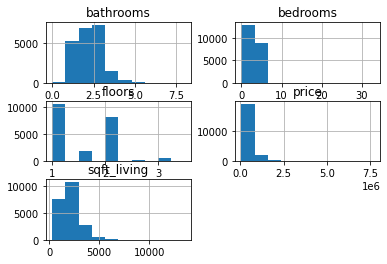

In [8]:
#Perform Basic EDA

dataset.hist()

In [9]:
#Get the correlation

dataset.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


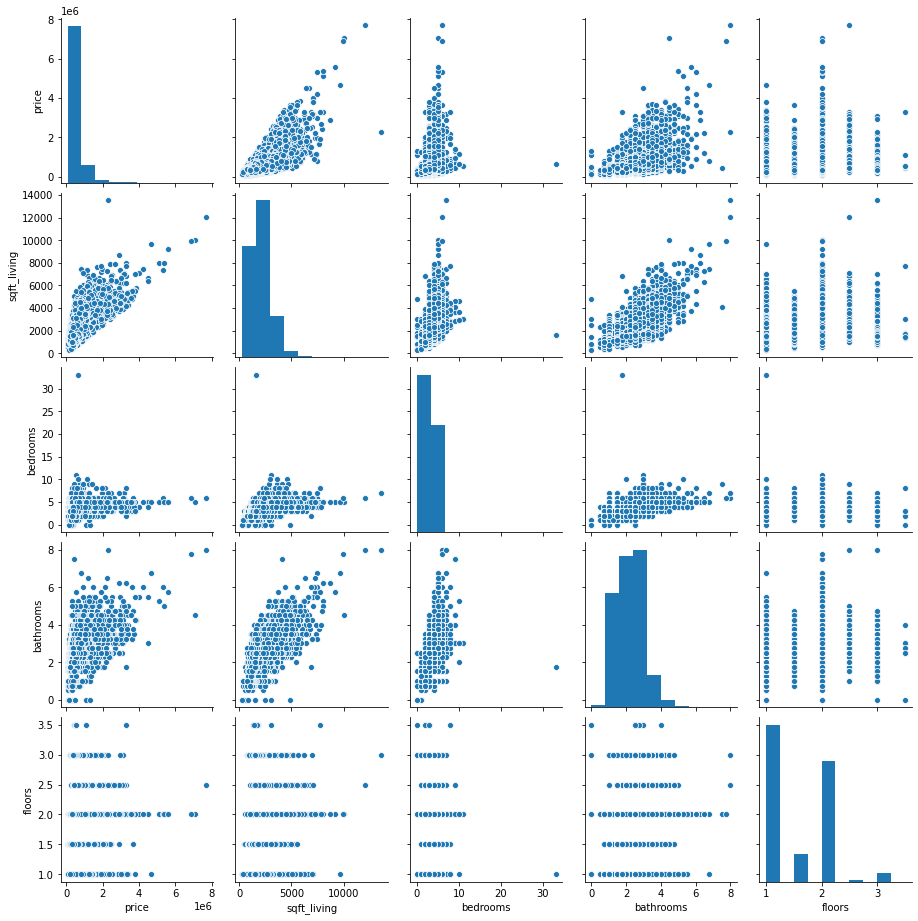

In [10]:
sns.pairplot(dataset)

In [12]:
#Assign and X and y dataset

X = dataset[['sqft_living', 'bedrooms', 'bathrooms', 'floors']]
X.head()

,sqft_living,bedrooms,bathrooms,floors
0,1180,3,1.00,1.0
1,2570,3,2.25,2.0
2,770,2,1.00,1.0
3,1960,4,3.00,1.0
4,1680,3,2.00,1.0


In [13]:
Y = dataset[['price']]
Y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [15]:
#Divide the dataset in to training and test dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [16]:
#Check the shapes and sizes to understand and verify that the splits has been done in 20-80% ratio

print("Dataset Shape", dataset.shape)
print("X_train Shape", X_train.shape)
print("X_test Shape", X_test.shape)
print("Y_train Shape", Y_train.shape)
print("Y_test Shape", Y_test.shape)

Dataset Shape (21613, 5)
X_train Shape (17290, 4)
X_test Shape (4323, 4)
Y_train Shape (17290, 1)
Y_test Shape (4323, 1)


In [17]:
#Build the model and train it with fit() method

mul_regression = LinearRegression()
mul_regression.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
mul_regression.coef_

array([[   309.11099034, -57550.54119311,   8440.49060067,
         -1165.39355228]])

In [19]:
mul_regression.intercept_

array([76097.63298339])

In [20]:
#Test the model with test dataset

ypred = mul_regression.predict(X_test)
ypred

array([[608095.96846158],
       [585712.20079791],
       [416482.58364346],
       ...,
       [683810.03201801],
       [221742.65972713],
       [426849.61955589]])

In [21]:
#Print the performance matrix

print('Mean absolute error: %2f ' % mean_absolute_error(Y_test, ypred))
print('Mean squared error: %2f ' % mean_squared_error(Y_test, ypred))
print('Root mean squared error: %2f ' % np.sqrt(mean_squared_error(Y_test, ypred)))
print('Variance score: %2f ' % explained_variance_score(Y_test, ypred))

#Co-efficient of determination
print('R^2 Square value: ', r2_score(Y_test, ypred))

Mean absolute error: 171605.949911 
Mean squared error: 67476917917.179306 
Root mean squared error: 259763.195848 
Variance score: 0.516864 
R^2 Square value:  0.5166693554435362


In [22]:
#Estimate the cost

RMSE = np.sqrt(mean_squared_error(Y_test, ypred))
r_square = r2_score(Y_test, ypred)

print('The R-square value is ', r_square)
print('The RMSE value is ', RMSE)

The R-square value is  0.5166693554435362
The RMSE value is  259763.19584802483


In [24]:
#Predict unseen values

unseen_pred_price = mul_regression.predict(np.array([[1200,3,2,1]]))
print('Predicted price for a flat with area 1200 sq.ft is ', unseen_pred_price)

Predicted price for a flat with area 1200 sq.ft is  [[290094.78546518]]
